<a href="https://colab.research.google.com/github/Glitch0110/AI-GiganciProgramowania/blob/main/L11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

wzór y = 7964.463789845459x + 29583.28909492403


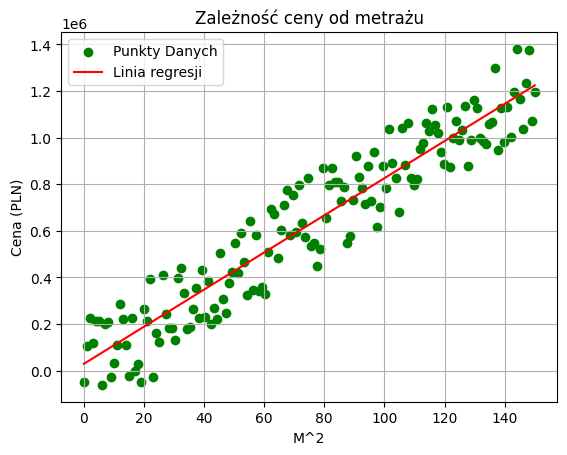

In [52]:
from numpy.random.mtrand import randint
def regression(x,y):
  sum_of_xy = 0
  sum_x = 0
  sum_y = 0
  sum_x_squared = 0
  n = len(x)

  for x_value, y_value in zip(x,y):
    sum_of_xy += x_value * y_value
    sum_x += x_value
    sum_y += y_value
    sum_x_squared += x_value ** 2


  a = (n*sum_of_xy - sum_x * sum_y) / (n*sum_x_squared - sum_x ** 2)
  b = (sum_y - a * sum_x) / n

  print(f"wzór y = {a}x + {b}")
  return a, b
#np.random.seed(42)
X = np.linspace(0, 150, 150)
noise = np.random.randint(-220000, 220000, 150)
Y = 8300 * X + 3 + noise

a, b = regression(X, Y)
Y_pred = a * X + b

plt.scatter(X, Y, color="green", label="Punkty Danych")
plt.plot(X, Y_pred, color='red', label="Linia regresji")
plt.xlabel("M^2")
plt.ylabel("Cena (PLN)")
plt.grid(True)
plt.legend()
plt.title("Zależność ceny od metrażu")
plt.show()

korelacja = 0.9998
Poziom 4: prawdziwe 92, przewidziane 91.59, różnica -0.41
Poziom 7: prawdziwe 130, przewidziane 131.81, różnica 1.81
Poziom 9: prawdziwe 160, przewidziane 158.63, różnica -1.37


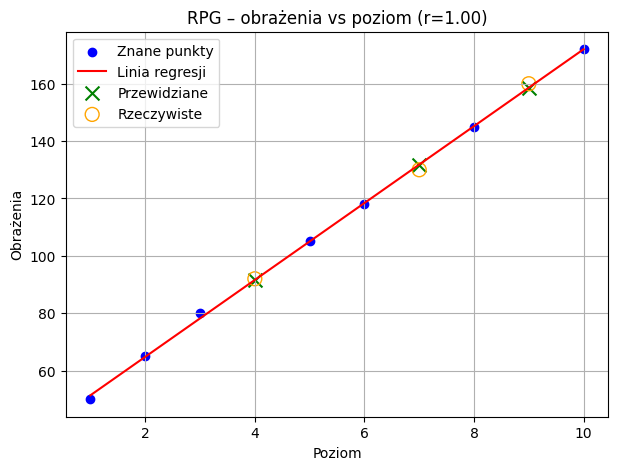

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
x = np.arange(1, 11, dtype=float)
y_true = np.array([50, 65, 80, 92, 105, 118, 130, 145, 160, 172])

# Indeksy brakujących
missing = np.array([3, 6, 8])        # poziomy 4, 7, 9 (indeksy 0-based)
known   = np.setdiff1d(np.arange(len(x)), missing)

# Regresja na znanych punktach (bez masek i NaN)
a, b = np.polyfit(x[known], y_true[known], 1)
y_pred = a * x + b

# Korelacja na znanych
r = np.corrcoef(x[known], y_true[known])[0, 1]
print(f"korelacja = {r:.4f}")
for i in missing:
    print(f"Poziom {int(x[i])}: prawdziwe {y_true[i]}, przewidziane {y_pred[i]:.2f}, różnica {y_pred[i]-y_true[i]:.2f}")

# Wykres
plt.figure(figsize=(7,5))
plt.scatter(x[known], y_true[known], color="blue", label="Znane punkty")
plt.plot(x, y_pred, color="red", label="Linia regresji")
plt.scatter(x[missing], y_pred[missing], marker="x", color="green", s=100, label="Przewidziane")
plt.scatter(x[missing], y_true[missing], facecolors='none', edgecolors='orange', s=100, label="Rzeczywiste")
plt.title(f"RPG – obrażenia vs poziom (r={r:.2f})")
plt.xlabel("Poziom"); plt.ylabel("Obrażenia")
plt.legend(); plt.grid(True); plt.show()